#TRABAJO PARCIAL - BACKTRAKING

In [128]:
import pandas as pd
import networkx as nx

In [129]:
CP = pd.read_csv("https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity/main/data/poblaciones.csv")

In [130]:
CP.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,CENTRO POBLADO,LATITUD,LONGITUD,NMI1,NMI2
0,AMAZONAS,BAGUA,ARAMANGO,EL MUYO (C.P.L.),-5.422545,-78.45299,311,1206
1,AMAZONAS,BAGUA,ARAMANGO,RESERVA UJUCANO,-5.427565,-78.444372,44,129
2,AMAZONAS,BAGUA,ARAMANGO,TUTUMBEROS,-5.327317,-78.44472,49,179
3,AMAZONAS,BAGUA,BAGUA,ALENYA BAJO,-5.682439,-78.495229,3,8
4,AMAZONAS,BONGARA,CUISPES,MITOPAMPA,-5.93856,-77.965302,1,4


In [131]:
def listaDistritos(prov):
  listitaDistritos = []
  
  for e in range(0,len(CP)):
    if CP['PROVINCIA'][e] == prov and (CP['DISTRITO'][e] not in listitaDistritos):
      
      listitaDistritos.append(CP['DISTRITO'][e])

  return listitaDistritos

In [132]:
distritoDF = dict()

distritos = listaDistritos('CHICLAYO')

for distrito in distritos:
  distritoDF[distrito] = CP[CP['DISTRITO'] == distrito]

In [133]:
def listaCP(distrito):
  listitaCP = []
  
  for e in range(0,len(CP)):
    if CP['DISTRITO'][e] == distrito:
      listitaCP.append(CP['CENTRO POBLADO'][e])

  return listitaCP

In [134]:
centrosPobladosDF = dict()
centrosPoblados = listaCP('NUEVA ARICA')

for cp in centrosPoblados:
  centrosPobladosDF[cp] = distritoDF['NUEVA ARICA'][distritoDF['NUEVA ARICA']['CENTRO POBLADO'] ==cp]

In [135]:
centrosPobladosDF

{'DOS CORRALES':      DEPARTAMENTO PROVINCIA     DISTRITO  ...    LONGITUD NMI1 NMI2
 1618   LAMBAYEQUE  CHICLAYO  NUEVA ARICA  ...  -79.366007   13   36
 
 [1 rows x 8 columns],
 'EL PALMO':      DEPARTAMENTO PROVINCIA     DISTRITO  ...    LONGITUD NMI1 NMI2
 1619   LAMBAYEQUE  CHICLAYO  NUEVA ARICA  ...  -79.332908    1    2
 
 [1 rows x 8 columns],
 'LA VIÑA':      DEPARTAMENTO PROVINCIA     DISTRITO  ...    LONGITUD NMI1 NMI2
 1620   LAMBAYEQUE  CHICLAYO  NUEVA ARICA  ...  -79.457594  131  406
 
 [1 rows x 8 columns],
 'PAMPA DE LEQUE LEQUE':      DEPARTAMENTO PROVINCIA     DISTRITO  ...    LONGITUD NMI1 NMI2
 1621   LAMBAYEQUE  CHICLAYO  NUEVA ARICA  ...  -79.366725    3    7
 
 [1 rows x 8 columns],
 'SALDAÑA BAJO':      DEPARTAMENTO PROVINCIA     DISTRITO  ...    LONGITUD NMI1 NMI2
 1622   LAMBAYEQUE  CHICLAYO  NUEVA ARICA  ...  -79.450958    9   30
 
 [1 rows x 8 columns]}

In [136]:
type(centrosPobladosDF['DOS CORRALES']) #TYPO DE SUS ELEMENTOS DE LA LLAVE 'DOS CORRALES'
centrosPobladosDF['DOS CORRALES']       #ELEMENTOS DE LA LLAVE 'DOS CORRALES'

,DEPARTAMENTO,PROVINCIA,DISTRITO,CENTRO POBLADO,LATITUD,LONGITUD,NMI1,NMI2
1618,LAMBAYEQUE,CHICLAYO,NUEVA ARICA,DOS CORRALES,-6.877873,-79.366007,13,36


In [137]:
#Funcion para extraer info distrito
def lista(df):
  Lista_Keys = []
  Lista_Nodos = []
  #Agregando las llaves de 'df' en una lista
  for k in df.keys():
    Lista_Keys.append(k)
  for i in range(len(df)):
    nodo = df[Lista_Keys[i]]
    Lista_Nodos.append(nodo.values.tolist())
  return Lista_Nodos

In [138]:
info_CentrosP=lista(centrosPobladosDF)
info_CentrosP

[[['LAMBAYEQUE',
   'CHICLAYO',
   'NUEVA ARICA',
   'DOS CORRALES',
   '-6.877873',
   '-79.366007',
   '13',
   '36']],
 [['LAMBAYEQUE',
   'CHICLAYO',
   'NUEVA ARICA',
   'EL PALMO',
   '-6.862513',
   '-79.332908',
   '1',
   '2']],
 [['LAMBAYEQUE',
   'CHICLAYO',
   'NUEVA ARICA',
   'LA VIÑA',
   '-6.897734',
   '-79.457594',
   '131',
   '406']],
 [['LAMBAYEQUE',
   'CHICLAYO',
   'NUEVA ARICA',
   'PAMPA DE LEQUE LEQUE',
   '-6.883703',
   '-79.366725',
   '3',
   '7']],
 [['LAMBAYEQUE',
   'CHICLAYO',
   'NUEVA ARICA',
   'SALDAÑA BAJO',
   '-6.895315',
   '-79.450958',
   '9',
   '30']]]

In [139]:
#Funcion para agregar las llaves de "centrosPobladosDF" en una Lista
def lista2(df):
  Lista_Keys = []
  #Agregando las llaves de 'df' en una lista
  for k in df.keys():
    Lista_Keys.append(k)
  return Lista_Keys

In [140]:
llaves_CentrosP= lista2(centrosPobladosDF)
llaves_CentrosP

['DOS CORRALES', 'EL PALMO', 'LA VIÑA', 'PAMPA DE LEQUE LEQUE', 'SALDAÑA BAJO']

In [141]:
#Funcion para hallar distancia
def distancia(p1,p2):
  dist = ((float(p2[5]) - float(p1[5]))**2 + (float(p2[4]) - float(p1[4]))**2)**0.5
  return dist

In [154]:
#Funcion para crear un grafo en base con pesos
def crearGraph(path,lista):
  G = nx.DiGraph()
  for e in range(0,len(path)):
    for i in range(e,len(path)):
      if path[e] != path[i]:
        G.add_edge(path[e],path[i], weight = distancia(lista[e][0],lista[i][0]))

  return G

In [143]:
G = crearGraph(llaves_CentrosP,info_CentrosP)

In [155]:
import graphviz as gv
import networkx as nx

#FUNCION GRAFICAR GRAFO
def nx2gv(G, weighted=False, params={'rankdir': 'LR', 'size': '6'},
          path=None, pathparams={'color':'orangered'}, nodeinfo=False):
  g = gv.Graph('G')
  g.attr(**params)
  
  for u in G.nodes:
    if nodeinfo:
      g.node(str(u), **dict(G.nodes[u]))
    else:
      g.node(str(u))

  for u, v in G.edges():
    pp = pathparams if path and path[v] == u else {}

    if weighted:
      g.edge(str(u), str(v), f"{G.edges[u, v]['weight']}", **pp)
    else:
      g.edge(str(u), str(v), **pp)
      
  return g

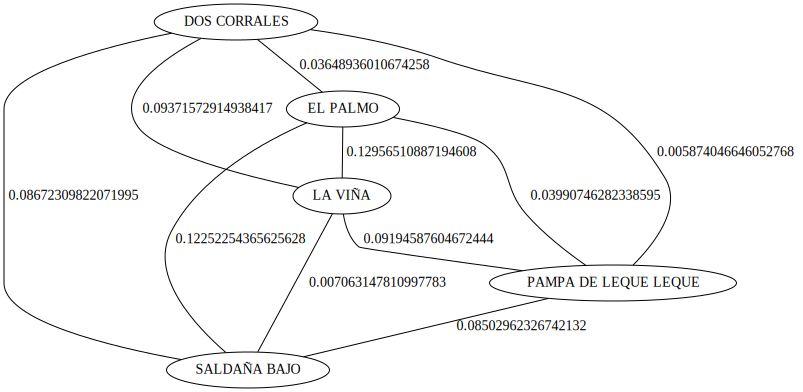

In [145]:
nx2gv(G, weighted=True,params={'size':'15'})

In [153]:
#FUNCION PARA SACAR MATRIZ ADYACENCIA PESOS (DISTANCIA)
def matAdy(lista,centPob):
  matrix= [] #FALTA ARREGLAR
  for i in range(len(centPob)):
    matrix.append([])
    for j in range(len(centPob)):
      if i != j:
        d = distancia(lista[i][0],lista[j][0])
        matrix[i].append(d)
      else:
        matrix[i].append(0)
  return matrix

In [152]:
matrixAdj= matAdy(info_CentrosP,llaves_CentrosP)
matrixAdj

[[0,
  0.03648936010674258,
  0.09371572914938417,
  0.005874046646052768,
  0.08672309822071995],
 [0.03648936010674258,
  0,
  0.12956510887194608,
  0.03990746282338595,
  0.12252254365625628],
 [0.09371572914938417,
  0.12956510887194608,
  0,
  0.09194587604672444,
  0.007063147810997783],
 [0.005874046646052768,
  0.03990746282338595,
  0.09194587604672444,
  0,
  0.08502962326742132],
 [0.08672309822071995,
  0.12252254365625628,
  0.007063147810997783,
  0.08502962326742132,
  0]]

In [149]:
#FUNCION PARA HALLAR LA RUTA MAS CORTA CON BT
def pathBT(matrix, v, currPos, N, count, cost,path):
  global paths
  if (count == N and matrix[currPos][0]):
    answer.append(cost + matrix[currPos][0])
    paths.append(path.copy())
    return

  #BT
  for i in range(N):
    if (v[i] == False and matrix[currPos][i]):
      
      v[i] = True
      path.append(i)

      pathBT(matrix, v, i, N, count + 1, cost + matrix[currPos][i],path)

      v[i] = False
      path.remove(i)

In [151]:
path=[]     #Lista de distancia
answer=[]   #Lista de respuestas
paths=[]    #Lista de caminos
visited = [False for i in range(5)]
visited[0]=True
path.append(0)

rutita=[]
pathBT(matrixAdj,visited,0,len(matrixAdj),1,0,path)

#Agregar la ruta en una lista
for i in range(len(G)):
  p=paths[answer.index(min(answer))]
  rutita.append(list(G)[p[i]])
rutita.append(list(G)[p[0]])

print("LA RUTA MÁS CORTA: ")
print(rutita)
print("Con la distancia: ")
print(min(answer))

LA RUTA MÁS CORTA: 
['DOS CORRALES', 'EL PALMO', 'PAMPA DE LEQUE LEQUE', 'LA VIÑA', 'SALDAÑA BAJO', 'DOS CORRALES']
Con la distancia: 
0.2621289450085707
